# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz

In [2]:
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   
}

In [3]:
import os 
import os
path_to_data = os.getenv("PATH_TO_CLASS_SZ_DATA")
print(path_to_data)

# Linear bias calculation

Here we compare the high-precision cl^kk emulators (`lCl`) from `class` to the Limber integral for lensing using Pk non-linear high-precision emulator (`lens_lens_hf`) computed by `classy_sz`.

In [4]:
%%time
cosmo = Class_sz()

cosmo.set(cosmo_params)
cosmo.set({
'output': 'lCl,lens_lens_hf',

'ell_max': 60000.0,
'ell_min': 2.0,
'dlogell': 0.1,
'dell': 0,

'z_min': 0.0,
'z_max': 150.,


'non_linear':'hmcode',


'cosmo_model':0,


})
cosmo.compute_class_szfast()
cl_kk_hm = cosmo.cl_kk

CPU times: user 16.2 s, sys: 3.34 s, total: 19.6 s
Wall time: 2.4 s


/Users/boris/venvdir/class_sz_312_brew/lib/python3.12/site-packages/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


(1e-10, 3e-07)

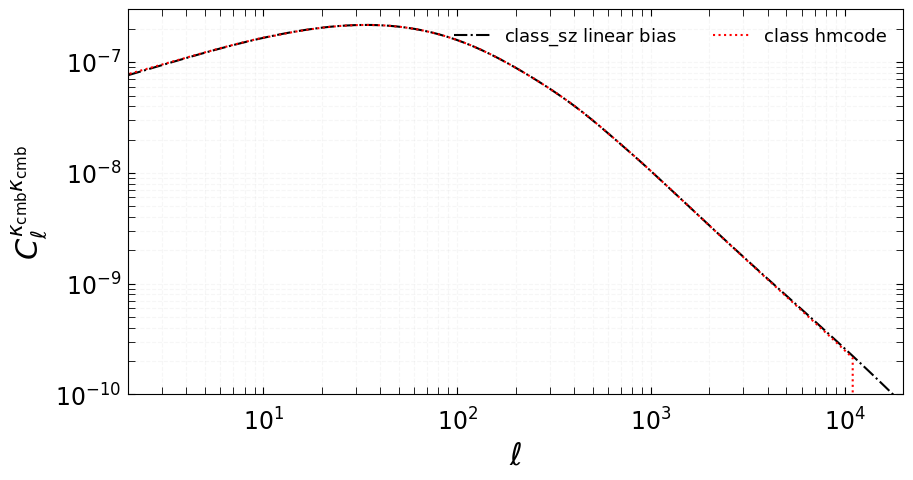

In [5]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk_hm()['ell'])
fac = ell*(ell+1.)/2./np.pi

cl_kk_hf = np.asarray(cl_kk_hm()['hf'])/fac


ax.plot(ell,cl_kk_hf,ls='-.',c='k',label=r'class_sz $\mathrm{linear\,\,bias}$')

l_class = cosmo.lensed_cl()['ell']
cl_kk_class = cosmo.lensed_cl()['pp']*(cosmo.lensed_cl()['ell']*(cosmo.lensed_cl()['ell']+1.)/2.)**2.
_, = ax.plot(l_class,
                     cl_kk_class,
                     ls=':',c='r',label=r'class hmcode')


plt.legend(frameon=True,framealpha=0,ncol=2,fontsize=13,loc=1)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(2e0,2.e4)
ax.set_ylim(1e-10,3e-7)

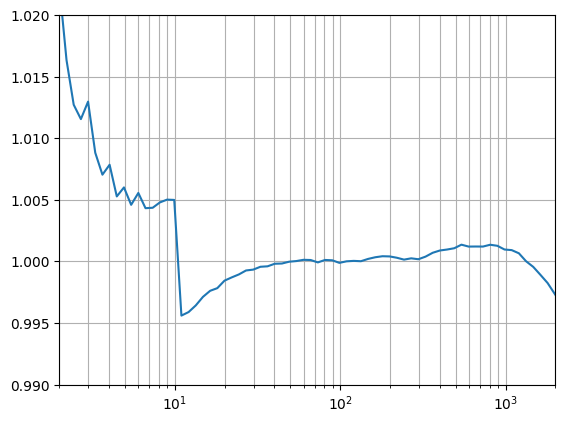

In [6]:
r = np.interp(ell,l_class,cl_kk_class)/cl_kk_hf
plt.plot(ell,r)
plt.xscale('log')
plt.ylim(0.99,1.02)
plt.xlim(2,2e3)
plt.grid(which='both')
# r